# Методичка

In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


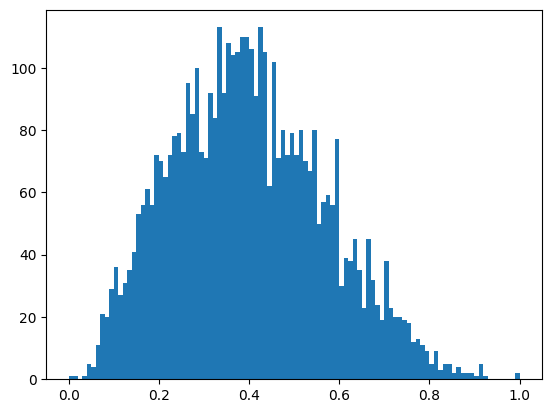

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [ ]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

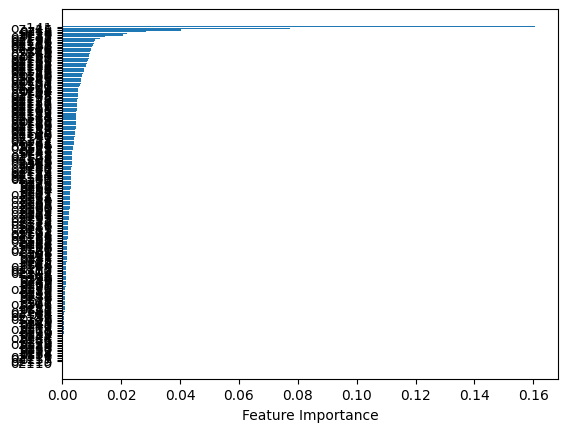

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
rf.feature_importances_[sort][-10:]

array([0.01092068, 0.01096695, 0.01298431, 0.01449995, 0.0206218 ,
       0.02210988, 0.02851247, 0.04041298, 0.07742048, 0.16042585])

In [ ]:
df.data.columns[sort][-10:]

Index(['oz179', 'oz198', 'oz197', 'oz112', 'oz137', 'oz35', 'oz18', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [ ]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz180,oz157,oz60,oz154,oz155,oz20,oz8,oz170,oz201,oz163,oz179,oz198,oz197,oz112,oz137,oz35,oz18,oz48,oz15,oz141
0,0.002655,0.000000,0.008905,0.030205,0.752291,0.000000,0.060606,0.866163,0.127564,0.059438,0.025609,0.039213,0.505899,0.000000,0.000000,0.0,0.0625,0.312855,0.000000,0.041308
1,0.002581,0.000281,0.107726,0.016908,0.745984,0.242424,0.373737,0.866069,0.475618,0.122765,0.024601,0.326584,0.683820,0.222222,0.278945,0.4,0.0625,0.297041,0.282828,0.212274
2,0.002722,0.001852,0.067220,0.006922,0.753298,0.388889,0.212121,0.866224,0.497968,0.153984,0.025104,0.204885,0.499219,0.000000,0.000000,0.0,0.1250,0.288557,0.388889,0.063643
3,0.002473,0.000158,0.058315,0.001240,0.767469,0.095238,0.171717,0.865988,0.134458,0.110089,0.025280,0.023469,0.630533,0.000000,0.039437,0.1,0.0000,0.310692,0.111111,0.031193
4,0.002810,0.000037,0.017809,0.011829,0.741548,0.260870,0.101010,0.866283,0.295913,0.075031,0.024934,0.111398,0.516053,0.000000,0.000000,0.0,0.0625,0.286581,0.304348,0.063643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.36870587972164093

In [ ]:
df.data.shape

(4450, 202)

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 55)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.43447959155607185

### Устранение дисбаланса классов

In [ ]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [ ]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [ ]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


#### Взвешивание классов

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [ ]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



#### Oversampling

In [ ]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [ ]:
X_train["target"] = y_train

In [ ]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [ ]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [ ]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [ ]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



### Дискретизация целевой переменной

In [ ]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-42-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


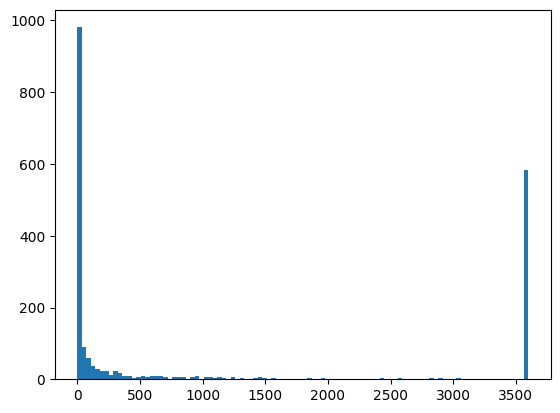

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


# Задания для самостоятельного выполнения

1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

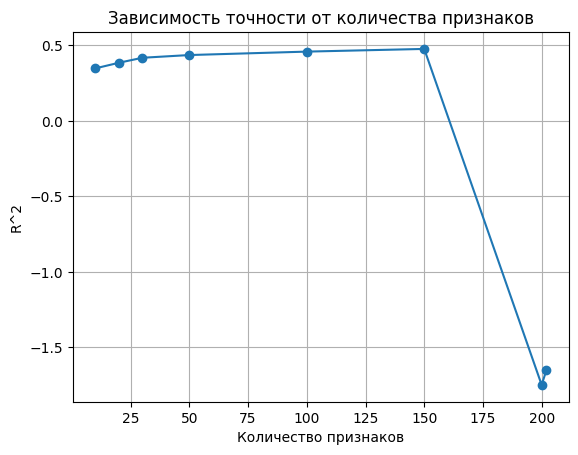

Лучшая оценка получена при количестве признаков: 150, R^2: 0.4757923434149076


In [ ]:
scores = []
n_features = [10, 20, 30, 50, 100, 150, 200, 202]

for n in n_features:
    trimmed = df.data[df.data.columns[sort][-n:]]
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(X_train_n, y_train_n)
    scores.append(model.score(X_test_n, y_test_n))

plt.plot(n_features, scores, marker='o')
plt.xlabel("Количество признаков")
plt.ylabel("R^2")
plt.title("Зависимость точности от количества признаков")
plt.grid(True)
plt.show()

optimal_n = n_features[np.argmax(scores)]
print(f"Лучшая оценка получена при количестве признаков: {optimal_n}, R^2: {max(scores)}")

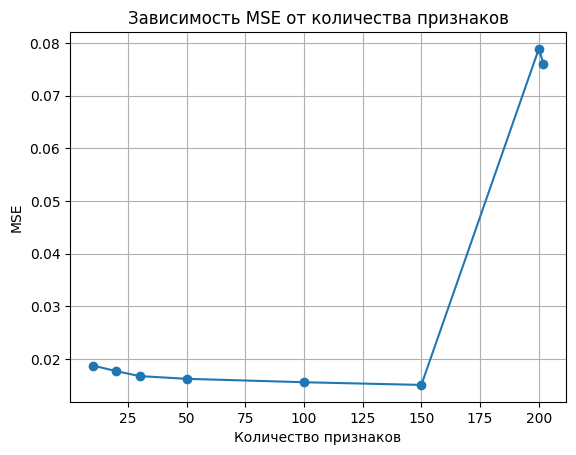

Лучшая оценка получена при количестве признаков: 150, MSE: 0.015050452397061426


In [ ]:
from sklearn.metrics import mean_squared_error
mse_scores = []
n_features = [10, 20, 30, 50, 100, 150, 200, 202]

for n in n_features:
    trimmed = df.data[df.data.columns[sort][-n:]]
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(X_train_n, y_train_n)
    y_pred_n = model.predict(X_test_n)
    mse = mean_squared_error(y_test_n, y_pred_n)
    mse_scores.append(mse)

plt.plot(n_features, mse_scores, marker='o')
plt.xlabel("Количество признаков")
plt.ylabel("MSE")
plt.title("Зависимость MSE от количества признаков")
plt.grid(True)
plt.show()

optimal_n = n_features[np.argmin(mse_scores)]
print(f"Лучшая оценка получена при количестве признаков: {optimal_n}, MSE: {min(mse_scores)}")


2. Используйте другие методы отбора признаков:

 2.1. Исключение низкодисперсных признаков;

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Исключаем признаки с низкой дисперсией
selector = VarianceThreshold(threshold=0.01)
X_trimmed_var = selector.fit_transform(df.data)
print("Размер после исключения признаков:", X_trimmed_var.shape)

Размер после исключения признаков: (4450, 133)


In [ ]:
X_train_var, X_test_var, y_train, y_test = train_test_split(X_trimmed_var, df.target, test_size=0.25, random_state=42)
model_var = LinearRegression()
model_var.fit(X_train_var, y_train)
print("R^2:", model_var.score(X_test_var, y_test))
y_pred = model_var.predict(X_test_var)
print("MSE:", mean_squared_error(y_test, y_pred))

R^2: -1.2929634074995526
MSE: 0.06583295031894273


Так как у R^2 плохой показатель, можем сделать вывод, что модель все еще переобучается из-за большого количества признаков

2.2. Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector_kbest = SelectKBest(score_func=f_regression, k=20)
X_trimmed_kbest = selector_kbest.fit_transform(df.data, df.target)
print("Размер после отбора по F-критерию:", X_trimmed_kbest.shape)

Размер после отбора по F-критерию: (4450, 20)


In [ ]:
X_train_kbest, X_test_kbest, y_train, y_test = train_test_split(X_trimmed_kbest, df.target, test_size=0.25, random_state=42)
model_kbest = LinearRegression()
model_kbest.fit(X_train_kbest, y_train)
print("R^2 (F-критерий):", model_kbest.score(X_test_kbest, y_test))

R^2 (F-критерий): 0.3582970568332712


R^2 намного выше, чем у базовой модели, но значение все еще мало

2.3. Рекурсивное исключение признаков;

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)
X_trimmed_rfe = rfe.fit_transform(df.data, df.target)
print("Размер после RFE:", X_trimmed_rfe.shape)

Размер после RFE: (4450, 20)


In [ ]:
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_trimmed_rfe, df.target, test_size=0.25, random_state=42)
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)
print("R^2:", model_rfe.score(X_test_rfe, y_test))
y_pred_rfe = model_rfe.predict(X_test_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print("MSE:", mse_rfe)

R^2: 0.2062299972737437
MSE: 0.02278981905390693


Значение R^2 также остается небольшим, но лучше, чем в базовой модели. MSE имеет значение, близкое к нулю, что является хорошим результатом.

2.4. Последовательное включение признаков;

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=20, direction='forward')
X_trimmed_sfs = sfs.fit_transform(df.data, df.target)
X_trimmed_sfs.shape

(4450, 20)

In [ ]:
X_train_sfs, X_test_sfs, y_train, y_test = train_test_split(X_trimmed_sfs, df.target, test_size=0.25, random_state=42)
model_sfs = LinearRegression()
model_sfs.fit(X_train_sfs, y_train)
print("R^2:", model_sfs.score(X_test_sfs, y_test))

R^2: 0.39873704636567475


Оценка выше, чем в других методах, но требует больше времени на выполнение, сложность операции больше.

2.5. Исключение по L1-норме (гребневой регрессии).

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.00001)
sfm = SelectFromModel(estimator=lasso, prefit=False)
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.547e+00, tolerance: 9.556e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
model = LinearRegression()
model.fit(X_train_selected, y_train)
score = model.score(X_test_selected, y_test)
print(f"R^2: {score:.3f}")

R^2: 0.502


Подобрала примерно альфу, при которой будет большая точность. Метод оказался самым эффективным из представленных

3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt


df = fetch_openml("balance-scale", version=1, as_frame=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

print("Распределение классов в обучающей выборке до обработки:")
print(y_train.value_counts())

Распределение классов в обучающей выборке до обработки:
class
R    216
L    215
B     37
Name: count, dtype: int64


In [ ]:
# Базовая модель (без обработки дисбаланса)
baseline_clf = LogisticRegression(max_iter=1000, random_state=42)
baseline_clf.fit(X_train, y_train)
bl_score = baseline_clf.score(X_test, y_test)
print("\nТочность базовой модели:", bl_score)
print("\nОтчет о классификации (базовая модель):")
print(classification_report(y_test, baseline_clf.predict(X_test)))



Точность базовой модели: 0.8598726114649682

Отчет о классификации (базовая модель):
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [ ]:
# Оверсемплинг с RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("\nРаспределение классов после RandomOverSampler:")
print(pd.Series(y_train_ros).value_counts())

ros_clf = LogisticRegression(max_iter=1000, random_state=42)
ros_clf.fit(X_train_ros, y_train_ros)
ros_score = ros_clf.score(X_test, y_test)
print("\nТочность модели с RandomOverSampler:", ros_score)
print("\nОтчет о классификации (RandomOverSampler):")
print(classification_report(y_test, ros_clf.predict(X_test)))



Распределение классов после RandomOverSampler:
class
B    216
L    216
R    216
Name: count, dtype: int64

Точность модели с RandomOverSampler: 0.9235668789808917

Отчет о классификации (RandomOverSampler):
              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [ ]:
# Оверсемплинг с SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nРаспределение классов после SMOTE:")
print(pd.Series(y_train_smote).value_counts())

smote_clf = LogisticRegression(max_iter=1000, random_state=42)
smote_clf.fit(X_train_smote, y_train_smote)
smote_score = smote_clf.score(X_test, y_test)
print("\nТочность модели с SMOTE:", smote_score)
print("\nОтчет о классификации (SMOTE):")
print(classification_report(y_test, smote_clf.predict(X_test)))



Распределение классов после SMOTE:
class
B    216
L    216
R    216
Name: count, dtype: int64

Точность модели с SMOTE: 0.8853503184713376

Отчет о классификации (SMOTE):
              precision    recall  f1-score   support

           B       0.46      0.92      0.61        12
           L       0.97      0.90      0.94        73
           R       0.95      0.86      0.91        72

    accuracy                           0.89       157
   macro avg       0.79      0.89      0.82       157
weighted avg       0.92      0.89      0.90       157



In [ ]:
# Андерсемплинг с RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nРаспределение классов после RandomUnderSampler:")
print(pd.Series(y_train_rus).value_counts())

rus_clf = LogisticRegression(max_iter=1000, random_state=42)
rus_clf.fit(X_train_rus, y_train_rus)
rus_score = rus_clf.score(X_test, y_test)
print("\nТочность модели с RandomUnderSampler:", rus_score)
print("\nОтчет о классификации (RandomUnderSampler):")
print(classification_report(y_test, rus_clf.predict(X_test)))



Распределение классов после RandomUnderSampler:
class
B    37
L    37
R    37
Name: count, dtype: int64

Точность модели с RandomUnderSampler: 0.8726114649681529

Отчет о классификации (RandomUnderSampler):
              precision    recall  f1-score   support

           B       0.41      0.92      0.56        12
           L       0.98      0.81      0.89        73
           R       0.96      0.93      0.94        72

    accuracy                           0.87       157
   macro avg       0.78      0.89      0.80       157
weighted avg       0.93      0.87      0.89       157



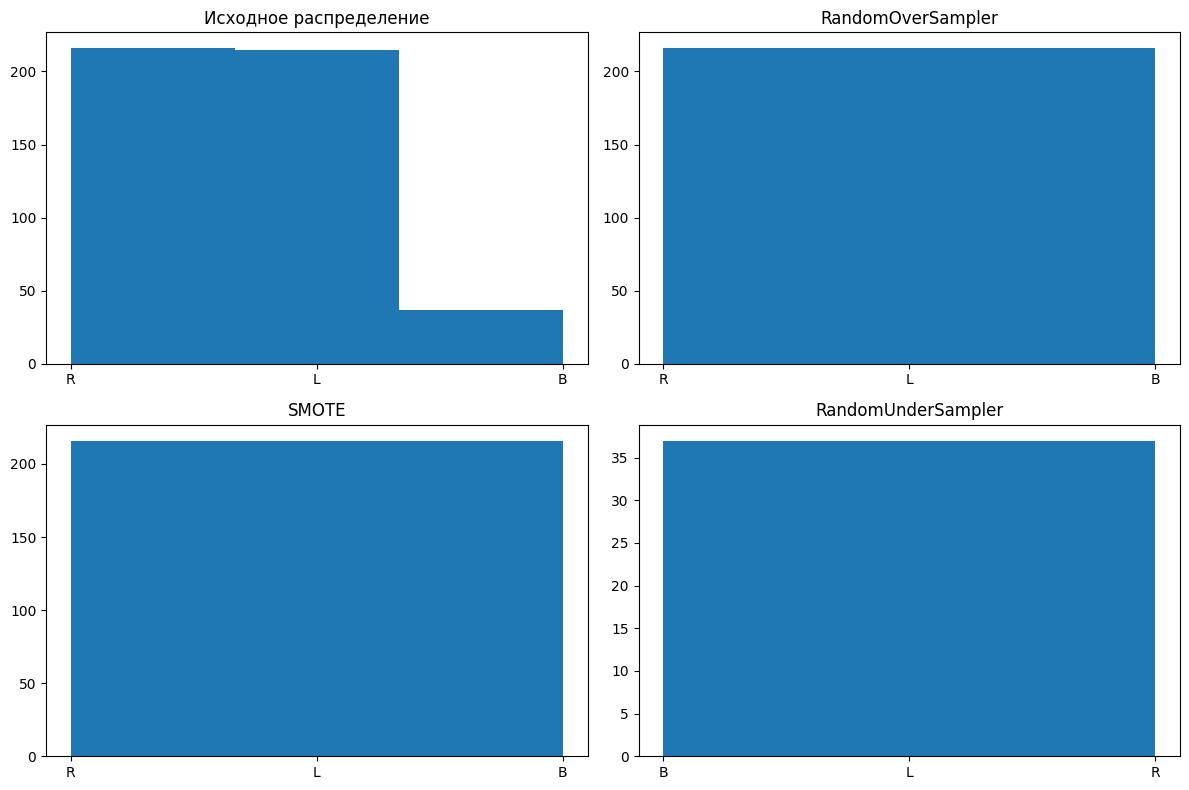

In [ ]:
# Визуализация распределений
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(y_train, bins=3)
plt.title("Исходное распределение")
plt.subplot(2, 2, 2)
plt.hist(y_train_ros, bins=3)
plt.title("RandomOverSampler")
plt.subplot(2, 2, 3)
plt.hist(y_train_smote, bins=3)
plt.title("SMOTE")
plt.subplot(2, 2, 4)
plt.hist(y_train_rus, bins=3)
plt.title("RandomUnderSampler")
plt.tight_layout()
plt.show()

4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

<ipython-input-9-78bb50782e7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)



Стратегия: uniform, Количество категорий: 3:
Точность: 0.9430740037950665
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       329
         1.0       0.00      0.00      0.00        13
         2.0       1.00      0.91      0.95       185

    accuracy                           0.94       527
   macro avg       0.64      0.64      0.64       527
weighted avg       0.92      0.94      0.93       527



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


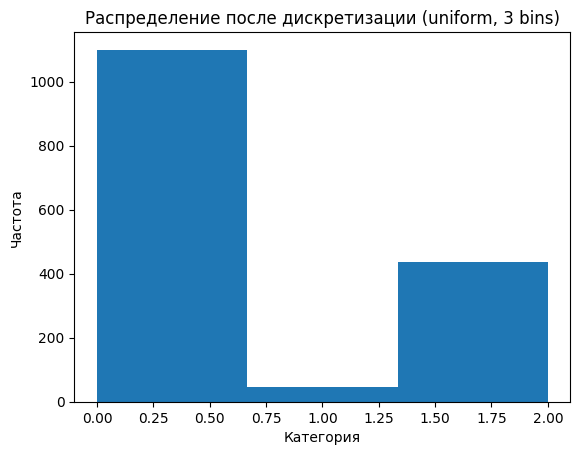


Стратегия: uniform, Количество категорий: 5:
Точность: 0.9184060721062619
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       316
         1.0       0.00      0.00      0.00        19
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         8
         4.0       1.00      0.94      0.97       179

    accuracy                           0.92       527
   macro avg       0.38      0.39      0.38       527
weighted avg       0.87      0.92      0.89       527



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

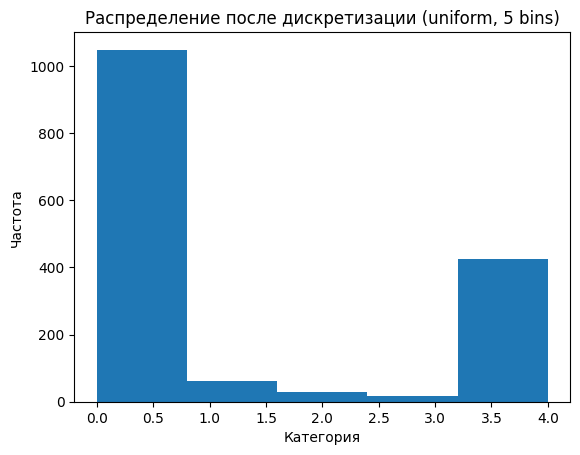


Стратегия: uniform, Количество категорий: 10:
Точность: 0.889943074003795
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       300
         1.0       0.00      0.00      0.00        16
         2.0       0.00      0.00      0.00        10
         3.0       0.50      0.11      0.18         9
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         6
         9.0       1.00      0.97      0.99       173

    accuracy                           0.89       527
   macro avg       0.23      0.21      0.21       527
weighted avg       0.82      0.89      0.85       527



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

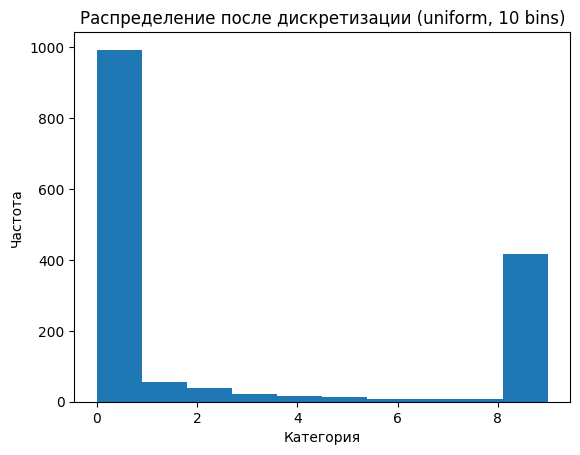


Стратегия: quantile, Количество категорий: 3:
Точность: 0.7703984819734345
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       164
         1.0       0.61      0.69      0.65       154
         2.0       0.99      0.82      0.90       209

    accuracy                           0.77       527
   macro avg       0.77      0.76      0.76       527
weighted avg       0.79      0.77      0.78       527



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


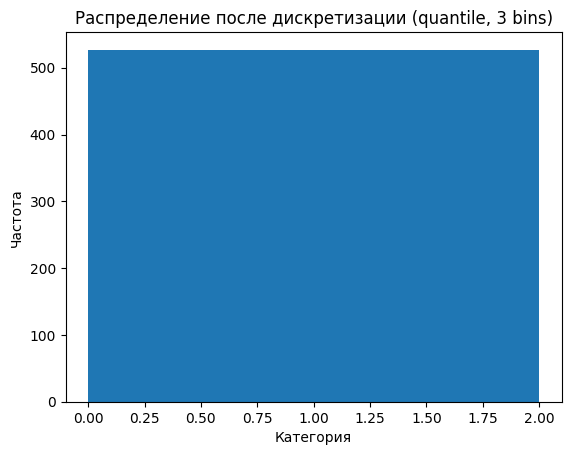

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Стратегия: quantile, Количество категорий: 5:
Точность: 0.6679316888045541
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.59      0.71      0.65        98
         1.0       0.47      0.45      0.46       105
         2.0       0.37      0.37      0.37        82
         3.0       0.90      0.85      0.87       242

    accuracy                           0.67       527
   macro avg       0.58      0.59      0.59       527
weighted avg       0.68      0.67      0.67       527



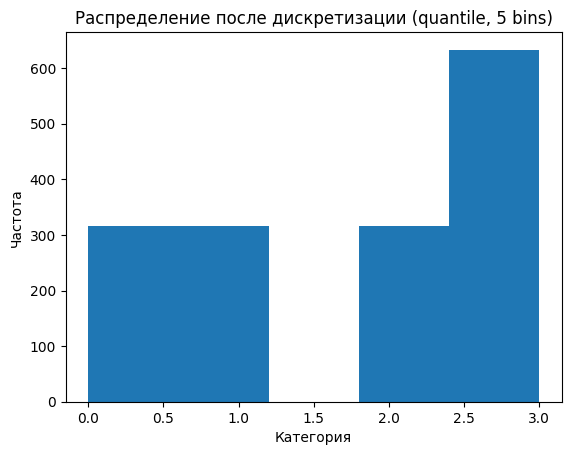

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(



Стратегия: quantile, Количество категорий: 10:
Точность: 0.5351043643263758
Отчет о классификации:
              precision    recall  f1-score   support

         0.0       0.45      0.71      0.55        52
         1.0       0.36      0.43      0.39        46
         2.0       0.21      0.20      0.21        50
         3.0       0.24      0.11      0.15        55
         4.0       0.22      0.26      0.24        39
         5.0       0.15      0.09      0.12        43
         6.0       0.37      0.53      0.43        49
         7.0       0.97      0.88      0.92       193

    accuracy                           0.54       527
   macro avg       0.37      0.40      0.38       527
weighted avg       0.54      0.54      0.53       527



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


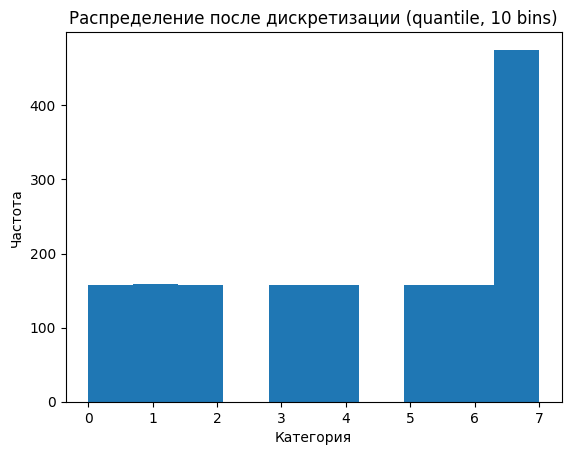


Базовая модель регрессии:
R^2: 0.891977926998725
MSE: 293002.4002672407


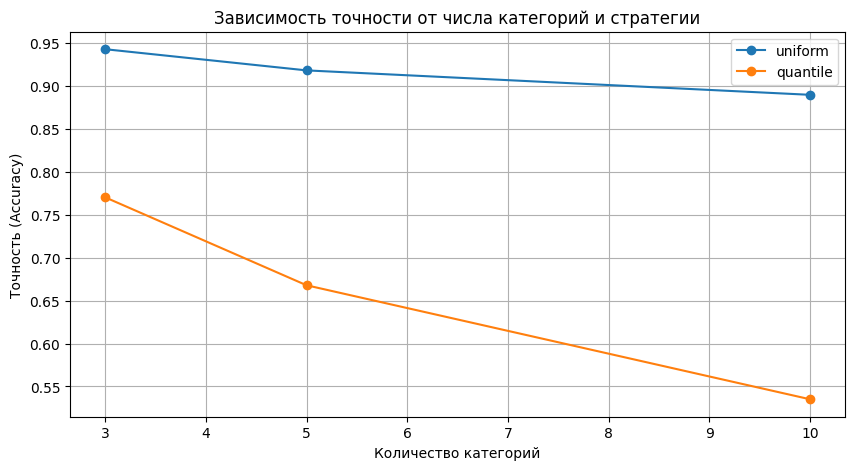

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import classification_report, accuracy_score


# Загружаем датасет CPMP-2015-regression
df = fetch_openml("CPMP-2015-regression", version=1, as_frame=True)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    df.data, df.target, test_size=0.25, random_state=42
)

# Функция для обучения и оценки модели классификации
def evaluate_model(X_train, y_train, X_test, y_test, strategy, n_bins, title):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy=strategy)
    y_train_binned = discretizer.fit_transform(pd.DataFrame(y_train)).ravel()
    y_test_binned = discretizer.transform(pd.DataFrame(y_test)).ravel()

    # Обучаем модель
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train_binned)

    # Оцениваем
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test_binned, y_pred)
    print(f"\n{title}:")
    print(f"Точность: {acc}")
    print("Отчет о классификации:")
    print(classification_report(y_test_binned, y_pred))

    # Визуализация распределения
    plt.hist(y_train_binned, bins=n_bins)
    plt.title(f"Распределение после дискретизации ({strategy}, {n_bins} bins)")
    plt.xlabel("Категория")
    plt.ylabel("Частота")
    plt.show()

    return acc

# Исследуем разные количества категорий и стратегии
strategies = ["uniform", "quantile"]
n_bins_list = [3, 5, 10]
results = []

for strategy in strategies:
    for n_bins in n_bins_list:
        title = f"Стратегия: {strategy}, Количество категорий: {n_bins}"
        acc = evaluate_model(X_train, y_train, X_test, y_test, strategy, n_bins, title)
        results.append((strategy, n_bins, acc))

# Базовая модель регрессии для сравнения
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
baseline_reg = LinearRegression()
baseline_reg.fit(X_train, y_train)
r2_base = baseline_reg.score(X_test, y_test)
mse_base = mean_squared_error(y_test, baseline_reg.predict(X_test))
print("\nБазовая модель регрессии:")
print(f"R^2: {r2_base}")
print(f"MSE: {mse_base}")

# Визуализация результатов
results_df = pd.DataFrame(results, columns=["Strategy", "n_bins", "Accuracy"])
plt.figure(figsize=(10, 5))
for strategy in strategies:
    subset = results_df[results_df["Strategy"] == strategy]
    plt.plot(subset["n_bins"], subset["Accuracy"], marker='o', label=strategy)
plt.xlabel("Количество категорий")
plt.ylabel("Точность (Accuracy)")
plt.title("Зависимость точности от числа категорий и стратегии")
plt.legend()
plt.grid(True)
plt.show()